# Formula 1 Winners Analysis Report

### About the Dataset
This report provides an all-round analysis of Formula 1 Grand Prix winners from 1950 to 2025. The analysis examines driver performance, team dominance, circuit characteristics, and historical trends to identify patterns and key insights in the sport's evolution.


**Creation:** This dataset was sourced directly from Kaggle, and the description below reflects exactly what the Kaggle dataset author states about its creation and purpose.

According to the creator, the dataset was built by web scraping public Formula 1 sources, including the Official F1 website, Wikipedia, and F1 Fandom pages. It captures key information for each race such as:
- Date and year
- Circuit details
- Winning driver and team
- Race time
- Laps completed

**Intended Use (as described by the author):** The Kaggle author (Julian Bloise) explains that the dataset can be used to::
- Driver performance trends across different seasons
- Team/Constructor dominance and specialization by circuit or era
- Historical comparisons of race times across different eras
- Driver-circuit affinity (which drivers excel at specific tracks)

**Historical Context:** The author notes that Formula 1 has been held globally since 1950 and highlights historic figures such as Michael Schumacher and Lewis Hamilton, iconic circuits like Monza, Monaco, and Silverstone, and legendary teams such as Ferrari, McLaren, and Mercedes.

## Data Processing & Preparation

The following steps were performed to clean and prepare the dataset for analysis:
- Missing values in key columns (team, winner name, circuit) were filled with "Unknown"
- Date column was converted to datetime format for time-series analysis
- A new 'year' column was extracted from the date for temporal analysis

This ensures data consistency and enables accurate historical trend analysis.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('default')


In [2]:
df = pd.read_csv("winners_f1_1950_2025_v2.csv")
df.head()


,date,continent,grand_prix,circuit,winner_name,team,time,laps,year
0,1950-05-13,Europe,Great Britain,Silverstone Circuit,Nino Farina,Alfa Romeo,02:13:23,70.0,1950
1,1950-05-21,Europe,Monaco,Circuit de Monaco,Juan Manuel Fangio,Alfa Romeo,03:13:18,100.0,1950
2,1950-05-30,North America,United States,Indianapolis Motor Speedway,Johnnie Parsons,Kurtis Kraft Offenhauser,02:46:55,138.0,1950
3,1950-06-04,Europe,Switzerland,Circuit Bremgarten,Nino Farina,Alfa Romeo,02:02:53,42.0,1950
4,1950-06-18,Europe,Belgium,Circuit de Spa Francorchamps,Juan Manuel Fangio,Alfa Romeo,02:47:26,35.0,1950


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1142 entries, 0 to 1141
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         1142 non-null   object 
 1   continent    1142 non-null   object 
 2   grand_prix   1142 non-null   object 
 3   circuit      1142 non-null   object 
 4   winner_name  1142 non-null   object 
 5   team         1142 non-null   object 
 6   time         1142 non-null   object 
 7   laps         1142 non-null   float64
 8   year         1142 non-null   int64  
dtypes: float64(1), int64(1), object(7)
memory usage: 80.4+ KB


In [4]:
df.columns


Index(['date', 'continent', 'grand_prix', 'circuit', 'winner_name', 'team',
       'time', 'laps', 'year'],
      dtype='object')

In [5]:
# Fill missing values
#df['team'].fillna("Unknown", inplace=True)
# df['winner_name'].fillna("Unknown", inplace=True)
# df['circuit'].fillna("Unknown", inplace=True)

df['team'] = df['team'].fillna("Unknown")
df['winner_name'] = df['winner_name'].fillna("Unknown")
df['circuit'] = df['circuit'].fillna("Unknown")


# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check 
df.isnull().sum()


date           0
continent      0
grand_prix     0
circuit        0
winner_name    0
team           0
time           0
laps           0
year           0
dtype: int64

## 1. Driver Performance Analysis

### Most Successful F1 Drivers (All-Time Wins)

This section identifies the drivers with the highest number of Grand Prix wins in Formula 1 history. The bar chart below ranks the top 10 most successful drivers, providing insight into which drivers have dominated the sport over the decades.

The bar chart below shows the top 10 F1 drivers by all-time wins. This gives a quick view of which drivers have been most dominant historically.

winner_name
Lewis Hamilton        105
Michael Schumacher     91
Max Verstappen         65
Sebastian Vettel       53
Alain Prost            51
Ayrton Senna           41
Fernando Alonso        32
Nigel Mansell          31
Jackie Stewart         27
Jim Clark              25
Name: count, dtype: int64


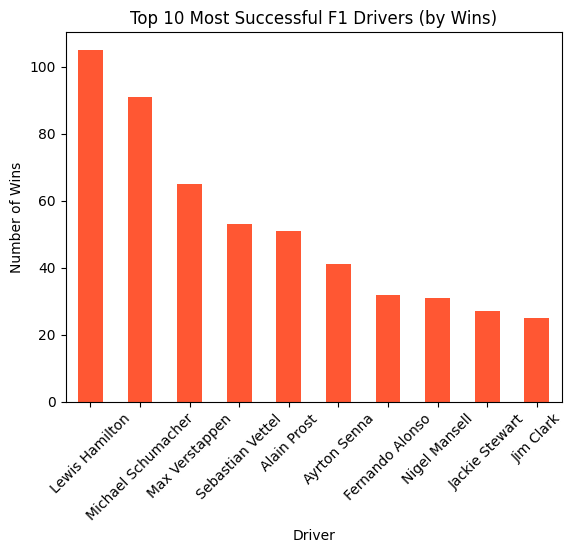

In [6]:
# Count wins per driver
driver_wins = df['winner_name'].value_counts().head(10)
print(driver_wins)

# Plot
driver_wins.plot(kind='bar', color='#FF5733')
plt.title("Top 10 Most Successful F1 Drivers (by Wins)")
plt.xlabel("Driver")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


From the chart, it’s clear that Lewis Hamilton and Michael Schumacher have far more wins than most other drivers. This highlights the influence of both driver skill and team performance.

## 2. Team Performance Analysis

### Most Successful F1 Teams (All-Time Wins)

This section examines team/constructor dominance by identifying which teams have won the most Grand Prix races throughout Formula 1 history. Constructor performance is a key indicator of both technical excellence and the ability to attract top-tier drivers.

team
Ferrari                       249
Mercedes                      121
McLaren Mercedes               85
Williams Renault               64
Lotus Ford                     47
McLaren Honda                  44
Red Bull Racing Renault        35
McLaren Ford                   35
Renault                        35
Red Bull Racing Honda RBPT     30
Name: count, dtype: int64


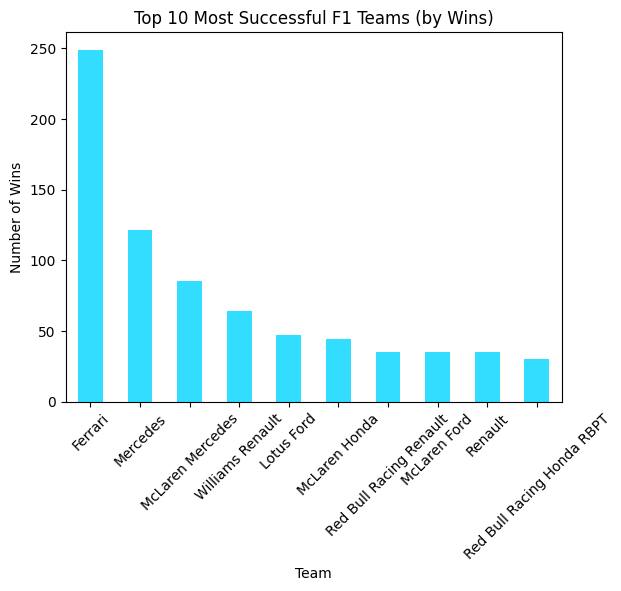

In [7]:
# Count wins per team
team_wins = df['team'].value_counts().head(10)
print(team_wins)

# Plot
team_wins.plot(kind='bar', color="#33DDFF")
plt.title("Top 10 Most Successful F1 Teams (by Wins)")
plt.xlabel("Team")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()

The bar chart shows the top 10 F1 teams with the most Grand Prix wins. Ferrari leads by a large margin, followed by Mercedes and McLaren. This highlights that team performance and good engineering play a major role in achieving consistent success in Formula 1, as top drivers often benefit from the resources and reliability of these dominant teams.


## 3. Temporal Analysis

### Driver Wins Over Time: Top 5 Drivers

This time-series analysis shows how the top 5 most successful drivers accumulated wins throughout their careers. The trend lines reveal periods of dominance, comebacks, and shifts in competitive advantage over the decades.

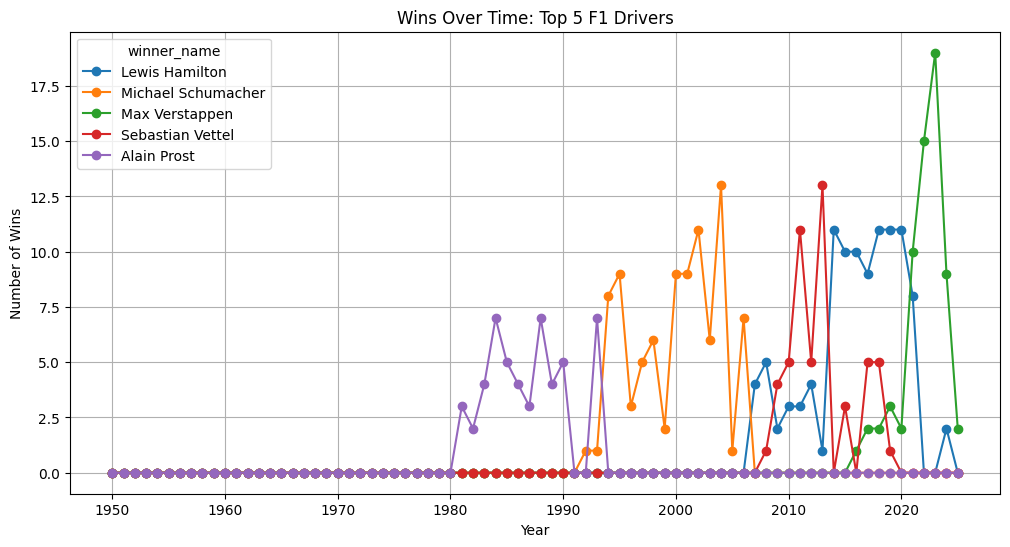

In [8]:
# Extract year from date 
df['year'] = df['date'].dt.year

# Pivot table: count wins per driver per year
wins_over_time = df.pivot_table(index='year', columns='winner_name', aggfunc='size', fill_value=0)

# Plot top 5 drivers with the most total wins
top_drivers = df['winner_name'].value_counts().head(5).index
wins_over_time[top_drivers].plot(figsize=(12,6), marker='o')
plt.title("Wins Over Time: Top 5 F1 Drivers")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.grid(True)
plt.show()


This line chart shows how the top 5 drivers accumulated wins over their careers. Peaks in the lines indicate periods when a driver dominated the sport, while flatter sections show slower years. It highlights career trends, comebacks, and shifts in competition among the top drivers across different eras of Formula 1.

### Team Wins Over Time: Top 5 Teams

This visualization tracks how the top 5 constructors have performed year by year. It illustrates the evolution of team dominance, technological advantages, and shifts in the competitive landscape of Formula 1 over the past 75 years.

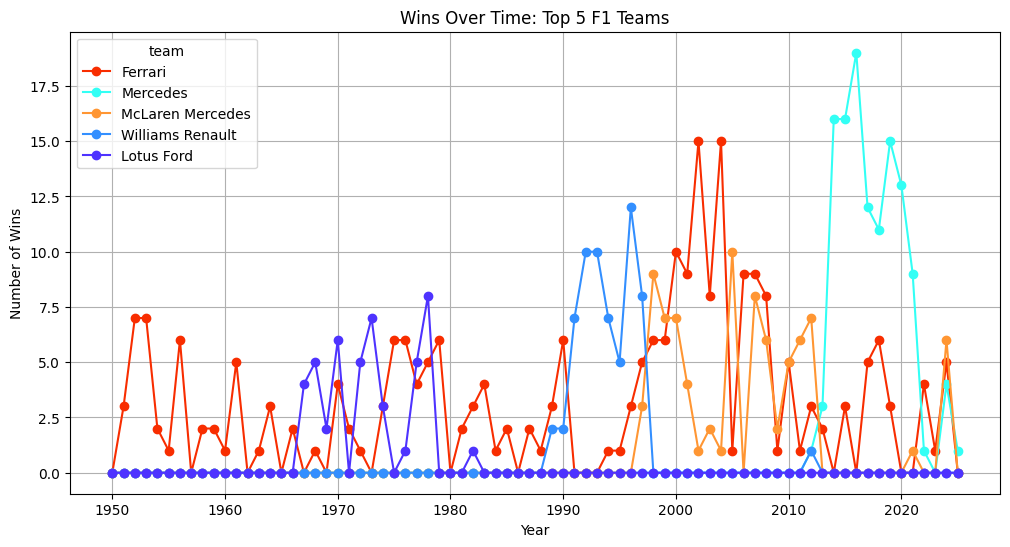

In [9]:
# Pivot table: count wins per team per year
wins_by_team = df.pivot_table(index='year', columns='team', aggfunc='size', fill_value=0)

# Plot top 5 teams with the most total wins
top_teams = df['team'].value_counts().head(5).index
wins_by_team[top_teams].plot(figsize=(12,6), marker='o', color=["#F82D00", "#33FFF5", "#FF9633", "#338FFF", "#4E33FF"])
plt.title("Wins Over Time: Top 5 F1 Teams")
plt.xlabel("Year")
plt.ylabel("Number of Wins")
plt.grid(True)
plt.show()


This line chart shows how the top 5 Formula 1 teams performed across different years. Each line tracks how many races a team won in each season. Higher points on the graph represent stronger seasons, while lower points show years with fewer wins. By comparing the lines, you can see which teams stayed consistently strong, which ones rose or fell over time, and how the balance of power in F1 has shifted across different eras.

## 4. Circuit Analysis

### Most Prestigious F1 Circuits

This section identifies the circuits that have hosted the most Formula 1 races won by various drivers. Certain tracks like Monaco and Silverstone are iconic venues where legendary performances occur. The top 10 circuits below represent the most frequently visited and historically significant locations on the F1 calendar.

circuit
Autodromo Nazionale di Monza    75
Circuit de Monaco               71
Silverstone Circuit             59
Circuit de Spa Francorchamps    58
Circuit Gilles Villeneuve       44
Autodromo José Carlos Pace      41
Nürburgring                     41
Hungaroring                     40
Red Bull Ring                   39
Hockenheimring                  37
Name: count, dtype: int64


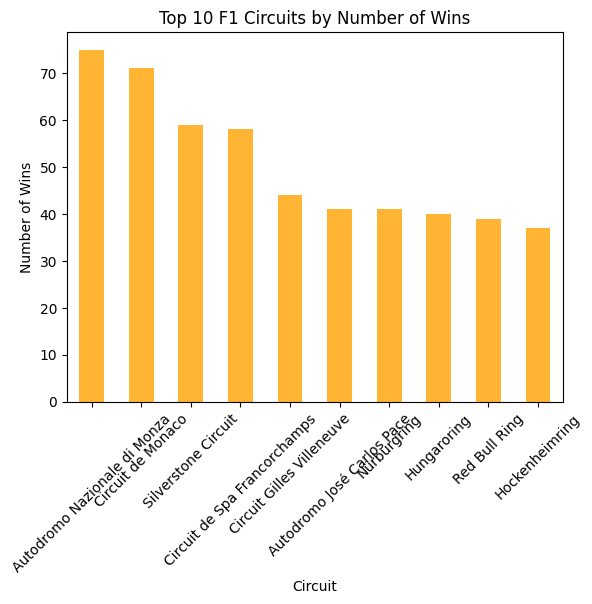

In [10]:
# Count wins per circuit
top_circuits = df['circuit'].value_counts().head(10)
print(top_circuits)

# Plot
top_circuits.plot(kind='bar', color='#FFB533')
plt.title("Top 10 F1 Circuits by Number of Wins")
plt.xlabel("Circuit")
plt.ylabel("Number of Wins")
plt.xticks(rotation=45)
plt.show()


This bar chart shows the 10 circuits where the most F1 races have been won. Each bar represents how many times a race has been held, and won at that track. Taller bars mean the circuit has hosted and has produced more winning results. This helps shows us which tracks are the most common or historically important in the F1 calendar.

## 5. Race Completion Analysis

### Average Laps Completed per Winner

This metric shows which drivers have the highest average lap completion during their Grand Prix wins. Drivers with high average laps tend to have won longer races or races with more demanding circuits, indicating endurance and consistency.

winner_name
Bob Sweikert       200.0
Bill Vukovich      200.0
Jim Rathmann       200.0
Jimmy Bryan        200.0
Troy Ruttman       200.0
Sam Hanks          200.0
Rodger Ward        200.0
Pat Flaherty       200.0
Lee Wallard        200.0
Johnnie Parsons    138.0
Name: laps, dtype: float64


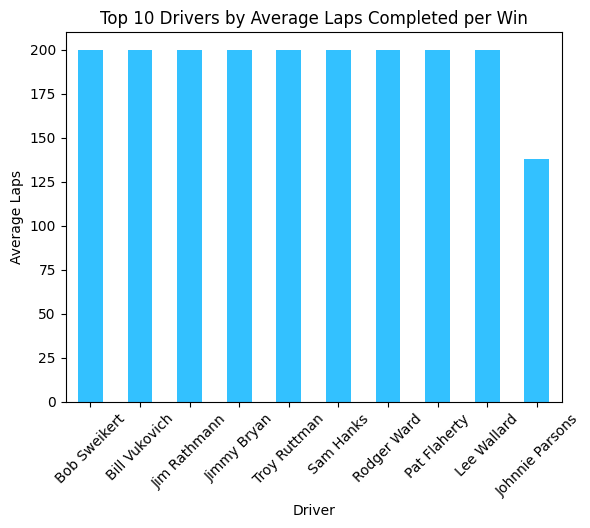

In [11]:
# Group by driver and calculate average laps
avg_laps = df.groupby('winner_name')['laps'].mean().sort_values(ascending=False).head(10)
print(avg_laps)

# Plot
avg_laps.plot(kind='bar', color='#33C1FF')
plt.title("Top 10 Drivers by Average Laps Completed per Win")
plt.xlabel("Driver")
plt.ylabel("Average Laps")
plt.xticks(rotation=45)
plt.show()


This bar chart shows the top 10 drivers who completed the highest average number of laps in the races they won. Each bar represents a driver’s average laps per victory. Drivers with taller bars tend to win longer or more demanding races, while lower bars indicate wins in shorter events. This helps compare how the length of races varies across different drivers’ victories.

## 6. Geographic Distribution

### Wins by Continent

Formula 1 is a global sport with races held across multiple continents. This analysis shows the geographic distribution of victories, highlighting which regions have been historically dominant in hosting and winning Grand Prix races.

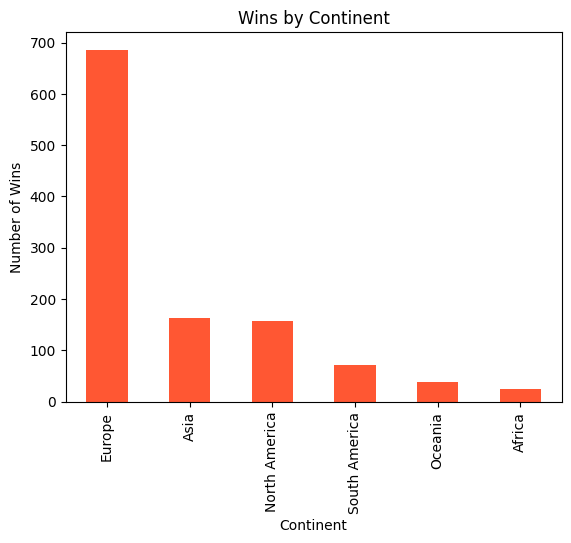

In [12]:
df['continent'].value_counts().plot(kind='bar', color='#FF5733', title="Wins by Continent")
plt.xlabel("Continent")
plt.ylabel("Number of Wins")
plt.show()


This bar chart shows how many Formula 1 races were won on each continent. Each bar represents the total number of wins recorded in that region. This helps compare which continents host the most races and where most wins in the dataset have taken place.

## 7. Formula 1 Season Trends

### Number of Races per Year

This time-series visualization shows how the Formula 1 calendar has evolved since 1950. The increasing number of races per year reflects the sport's growth, increased global expansion, and the expansion of the racing schedule in recent decades.

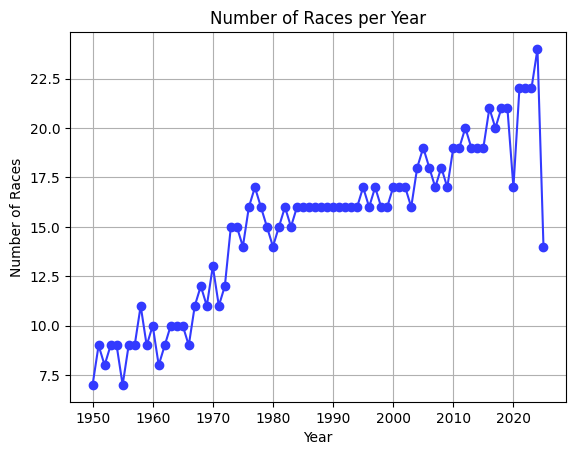

In [13]:
df['year'].value_counts().sort_index().plot(marker='o', color="#333AFF", title="Number of Races per Year")
plt.xlabel("Year")
plt.ylabel("Number of Races")
plt.grid(True)
plt.show()


This line chart shows how many Formula 1 races occurred each year. By counting the number of entries for each year and plotting them over time, we can see how the sport has grown. Any upward trends suggest seasons with more races, while dips show years with fewer events.

## 8. Driver Dominance & Streaks

### Longest Winning Streaks

One of the most impressive achievements in Formula 1 is winning consecutive races. This analysis identifies the drivers with the longest consecutive winning streaks throughout history. These streaks often represent periods of exceptional driver skill combined with competitive vehicle performance and favorable race circumstances.

Max Verstappen        10
Sebastian Vettel       9
Alberto Ascari         7
Nico Rosberg           7
Michael Schumacher     7
Nigel Mansell          5
Lewis Hamilton         5
Jim Clark              5
Jack Brabham           5
Jochen Rindt           4
dtype: int64


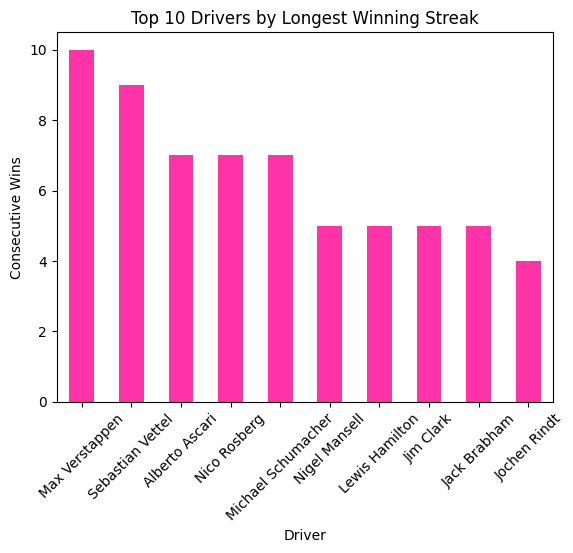

In [14]:
# dataset is sorted by date
df = df.sort_values('date').reset_index(drop=True)


streak_driver = None
current_streak = 0
max_streak = 0
streaks = {}

# Loop
for winner in df['winner_name']:
    if winner == streak_driver:
        current_streak += 1
    else:
        streak_driver = winner
        current_streak = 1
    if winner not in streaks or current_streak > streaks[winner]:
        streaks[winner] = current_streak

# Convert to series and get top 10 streaks
streaks_series = pd.Series(streaks).sort_values(ascending=False).head(10)
print(streaks_series)

# Plot
streaks_series.plot(kind='bar', color='#FF33A8')
plt.title("Top 10 Drivers by Longest Winning Streak")
plt.xlabel("Driver")
plt.ylabel("Consecutive Wins")
plt.xticks(rotation=45)
plt.show()


This bar chart highlights the drivers with the longest winning streaks in Formula 1, meaning the number of races a driver won in a row without losing. By going through the races in order, it tracks how many consecutive wins each driver achieved and finds the highest streak for each one. The plot shows the top 10 longest streaks, helping us see which drivers were able to stay dominant for multiple races in a row.

## 9. Driver-Circuit Affinity

### Top Driver-Circuit Combinations

This analysis reveals which drivers have performed exceptionally well at specific circuits. Some drivers develop a special affinity for certain tracks due to their driving style, the car's characteristics, or personal preference. These driver-circuit pairings highlight where specific drivers have found the most success.

In [15]:
top_driver_circuit = df.groupby(['winner_name','circuit']).size().sort_values(ascending=False).head(10)
print(top_driver_circuit)


winner_name         circuit                           
Lewis Hamilton      Silverstone Circuit                   9
Michael Schumacher  Circuit de Nevers Magny Cours         8
Lewis Hamilton      Hungaroring                           8
Michael Schumacher  Circuit Gilles Villeneuve             7
                    Imola                                 7
Lewis Hamilton      Circuit Gilles Villeneuve             7
Michael Schumacher  Circuit de Barcelona Catalunya        7
                    Suzuka International Racing Course    6
Lewis Hamilton      Shanghai International Circuit        6
Michael Schumacher  Circuit de Spa Francorchamps          6
dtype: int64


This table shows the top 10 driver–circuit combinations with the most wins. It looks at how many times each driver has won at each specific circuit, then sorts them from highest to lowest. This helps highlight which drivers tend to dominate certain tracks more than others.

In [16]:
top_driver_team = df.groupby(['winner_name','team']).size().sort_values(ascending=False).head(10)
print(top_driver_team)


winner_name         team                      
Lewis Hamilton      Mercedes                      84
Michael Schumacher  Ferrari                       72
Ayrton Senna        McLaren Honda                 30
Sebastian Vettel    Red Bull Racing Renault       29
Max Verstappen      Red Bull Racing Honda RBPT    28
Nico Rosberg        Mercedes                      23
Lewis Hamilton      McLaren Mercedes              21
Damon Hill          Williams Renault              21
Mika Hakkinen       McLaren Mercedes              20
Jim Clark           Lotus Climax                  19
dtype: int64


This table shows the top 10 driver–team combinations based on total wins. It counts how many races each driver has won while driving for each team, then sorts them from highest to lowest. This makes it easy to see which driver–team partnerships were the most successful.

---

## Conclusion

This comprehensive analysis of Formula 1 winners from 1950 to 2025 reveals:

1. **Driver Dominance**: A select group of elite drivers have accumulated the vast majority of wins, with clear patterns of success.

2. **Team Importance**: Constructor quality significantly influences success, with historically dominant teams like Ferrari, McLaren, and Mercedes maintaining competitive edges.

3. **Geographic Spread**: While Formula 1 started in Europe, it has expanded globally, reflected in the increasing number of races and geographic diversity of venues.

4. **Evolution of Competition**: The number of races per season has grown, reflecting the sport's expansion and the increasing demand for more racing events.

5. **Specialization**: Certain drivers show exceptional affinity for specific circuits and teams, suggesting that the combination of driver skill, team capability, and track characteristics is crucial for success.

This analysis demonstrates that Formula 1 success is depending on multiple factors such as exceptional driver talent, world-class team engineering, competitive resources, and the right combination of circumstances to achieve championship-winning performances.

### Sources: 

- Kaggle Link: https://www.kaggle.com/datasets/julianbloise/winners-formula-1-1950-to-2025
- Python Matplotlib Documentation: https://matplotlib.org/stable/index.html
